# Painting application using OpenCV 

#### This is an application where you can draw virtually and they also have a choice of colors to choose from. To be able to draw, you would need to use a purple bottle cap as the pen.

Loaded model from disk
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
5
5
5
5
5
5
9
9
5
9
5
9
2
5
1
2
5
2
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6


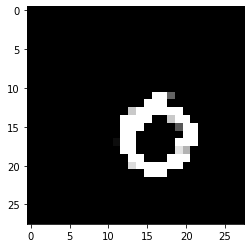

In [34]:
#importing the necessary libraries
import numpy as np
import math
import cv2
from tensorflow import keras
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.models import model_from_json
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

loaded_model=keras.models.load_model(r'C:\Users\anusha\Desktop\little_learners\final_model.h5')
print("Loaded model from disk")

capture=cv2.VideoCapture(0)
color=(0,255,0)
thickness=10

#setting width and heigth of the frame
capture.set(3,2000)
capture.set(4,2000)

points=[]
canvas=np.zeros((720, 1280, 3),np.uint8)

while capture.isOpened():
    
    ret,frame=capture.read()
    frame=cv2.flip(frame, 1)
    

    #defining the paintboxes

    green= cv2.rectangle(frame, (0,0), (100,100), (0,255,0), -1) 
    blue= cv2.rectangle(frame, (0,150), (100,250), (255,0,0), -1) 
    red= cv2.rectangle(frame, (0,300), (100,400), (0,0,255), -1)
    yellow= cv2.rectangle(frame, (0,450), (100,550), (0,255,255), -1)
    black= cv2.rectangle(frame, (0,600), (100,700), (0,0,0), -1)
    cv2.putText(frame,'Eraser', (0, 650),  cv2.FONT_HERSHEY_SIMPLEX , 1,  (100, 255,10),  1,  cv2.LINE_4) 

    hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    
    #lower and upper values for purple
    lower_blue = np.array([127, 107, 45])
    upper_blue = np.array([163, 223, 155])

    mask=cv2.inRange(hsv,lower_blue,upper_blue)

    #erosion and dilation of the frame
    mask = cv2.erode(mask,np.ones((5,5)),iterations = 1)
    mask = cv2.dilate(mask,np.ones((5,5)),iterations = 2)

    #finding the contours
    contours, _ =cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    
    x=0
    y=0
    count=0
    
    gray = cv2.cvtColor(canvas,cv2.COLOR_BGR2GRAY)
    for contour in contours:
        approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
        area=cv2.contourArea(contour)
        if count==0:
            points.append((0,0))
            count=count+1
        if((len(approx)>8)&(area>100)):
            c = max(contours, key = cv2.contourArea)
            x,y,w,h = cv2.boundingRect(c)
            cv2.rectangle(frame,(x,y),(x+w,y+h),(255,255,255),2)
            height=int((x+x+w)/2)
            width=int((y+h+y)/2)
            points.append((height,width))
            points.append((height+6, width+2))
  
            if((x>0 and x<100) and (y>0 and y<100)):
                color=(0,255,0)
                thickness=5
            elif((x>0 and x<100) and (y<250 and y>150)):
                color= (255,0,0)
                thickness=5
            elif((x>0 and x<100) and (y<400 and y>300)):
                color=(0,0,255)
                thickness=5
            elif((x>0 and x<100) and (y>450 and y<550)):
                color=(0,255,255)
                thickness=5
            elif((x>0 and x<100) and (y<700 and y>600)):
                color=(0,0,0)
                thickness=50
            cv2.line(canvas,points[-1],points[-2],color,thickness)

            
            alphabet = gray[y-50:y + h + 50, x-50:x + w + 50]


            try:
                   newImage = cv2.resize(alphabet, (28, 28))
                   plt.imshow(newImage,cmap='gray')
                   newImage = np.array(newImage)
                   newImage = newImage.astype('float32')/255
                   prediction = loaded_model.predict(newImage.reshape(1,28,28,1))
                   prediction = np.argmax(prediction)
                   print(prediction)
            except cv2.error as e:
                print('Invalid frame!')
            
          

    frame = cv2.add(frame,canvas)
   

    #displaying the frame
    cv2.imshow("frame",frame) 


    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
capture.release()
cv2.destroyAllWindows()